***
# Survival Analysis using Lifelines
***

***
## Resources
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e
***

Dataset from lifelines about arrests

In [2]:
from lifelines.datasets import load_rossi

In [3]:
df=load_rossi()

Learning more about this dataset...

In [8]:
print(df.shape)
print(df.head())

(432, 9)
   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


***
## Kaplan-Meier Estimate
***

***Kaplan-Meier Estimate*** is used to measure the fraction of subjects who survived for a certain amount of survival time t[4] under the same circumstances[2]. It is used to give an average view of the population[7]. This method is also called the product limit. It allows a table called, life table, and a graph, called survival curve, to be produced for a better view of the population at risk[2]. Survival Time is defined as the time starting from a predefined point to the occurrence of the event of interest[5]. The Kaplan-Meier Survival Curve is the probability of surviving in a given length of time where time is considered in small intervals. For survival Analysis using Kaplan-Meier Estimate, there are three assumptions [4]:
- Subjects that are censored have the same survival prospects as those who continue to be followed.
- Survival probability is the same all the subjects, irrespective of when they are recruited in the study.
- The event of interest happens at the specified time. This is because the event can happen between two examinations. The estimated survival time can be more accurately measured if the examination happens frequently i.e if the time gap between examinations is very small.

The survival probability at any particular time is calculated as the number of subjects surviving divided by the number of people at risk. The censored subjects are not counted in the denominator[4]. 

In [9]:
from lifelines import KaplanMeierFitter

In [13]:
T = df['week']
E = df['arrest']

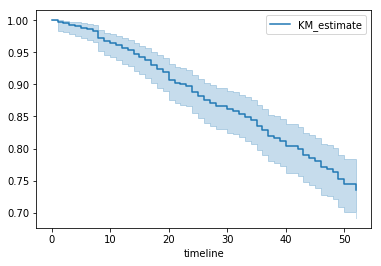

In [15]:
kmf=KaplanMeierFitter()
kmf.fit(T,event_observed=E)
kmf.plot()

***
## Nelson Aalen Fitter
***

Like the Kaplan-Meier Fitter, Nelson Aalen Fitter also gives us an average view of the population[7]. It is given by the number of deaths at time t divided by the number of subjects at risk. It is a non-parametric model. This means that there isn’t a functional form with parameters that we are fitting the data to. It doesn’t have any parameters to fit[7].

In [16]:
from lifelines import NelsonAalenFitter

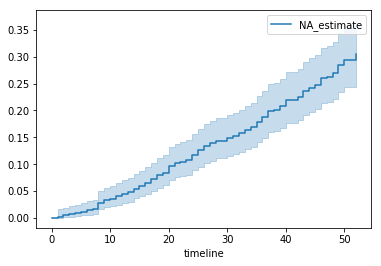

In [20]:
naf=NelsonAalenFitter()
naf.fit(T,event_observed=E)
naf.plot()

***
## Nelson Aalen Fitter
***

Like the Kaplan-Meier Fitter, Nelson Aalen Fitter also gives us an average view of the population[7]. It is given by the number of deaths at time t divided by the number of subjects at risk. It is a non-parametric model. This means that there isn’t a functional form with parameters that we are fitting the data to. It doesn’t have any parameters to fit[7].

In [21]:
from lifelines import CoxPHFitter

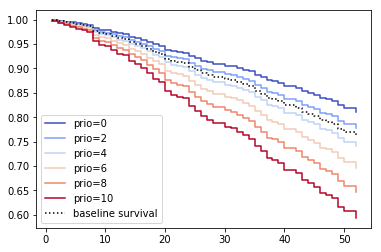

In [24]:
cph=CoxPHFitter()
cph.fit(df,duration_col='week',event_col='arrest',show_progress=False)
cph.plot_covariate_groups('prio',[0,2,4,6,8,10],cmap='coolwarm')

***
## Survival Analysis
***

One thing to point out is that the lifelines package assumes that every subject experienced the event of interest unless we specify it explicitly[8].

In [26]:
from lifelines.statistics import logrank_test

In [27]:
results = logrank_test(Timeline_1)

NameError: name 'Timeline_1' is not defined